In [1]:
import json
from PIL import Image


In [2]:
train_anno=json.load(open('panda_train_test_for_tiny_1024_1024.json'))

In [3]:
print(train_anno.keys())

dict_keys(['type', 'categories', 'old images', 'images', 'annotations'])


In [4]:
print(train_anno["type"])

instances


In [5]:
for item in train_anno["annotations"][0]:
    print("{0} : {1}".format(item,train_anno["annotations"][0][item]))

segmentation : [[1362, 449, 1362, 463, 1369, 463, 1369, 449]]
bbox : [1362, 449, 7, 14]
category_id : 1
area : 98
iscrowd : 0
image_id : 2
id : 0
ignore : False
uncertain : False
logo : False
in_dense_image : False
size : 98


In [6]:
for item in train_anno["images"][0]:
    print("{0} : {1}".format(item,train_anno["images"][0][item]))

file_name : 01_University_Canteen/IMG_01_01.jpg
height : 1024
width : 1024
id : 0
corner : [0, 0, 1024, 1024]


In [7]:
for item in train_anno["categories"]:
    print(item)

{'supercategory': 'none', 'id': 1, 'name': 'person'}


## erase

In [8]:
# trian_anno=json.load(open('annotations/tiny_set_train.json'))
# erase_train_anno=json.load(open('erase_with_uncertain_dataset/annotations/tiny_set_train.json'))
# #如果这里面有 ignore  uncertain logo的为true的数据说明不在训练图像中
# count_anno_f= lambda annos : len([anno for anno in annos if (anno['ignore']) or anno['uncertain'] or anno['logo']])  
# print('trian anno : ',count_anno_f(train_anno['annotations']))
# print('erase train anno:',count_anno_f(erase_train_anno['annotations']))

In [9]:
# from PIL import Image
# import matplotlib.pyplot as plt
# img=Image.open('train/'+train_anno['images'][1]['file_name'])
# erase_img=Image.open('erase_with_uncertain_dataset/train/'+train_anno['images'][1]['file_name'])
# plt.figure(figsize=(18,9))
# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.title('orgin image')
# plt.subplot(1,2,2)
# plt.imshow(erase_img)
# plt.title('erase image')
# plt.show()

## corner
corner dataset is trying to cut images in dataset piece by piece . Different from generating sub-images.images is just cutted on annotation file by adding a keywork 'corner' and then shifting GT box in sub-images. For example , cutting an image into K pieces.

the k sub-images share the same file_name with origin image, 'corner' represents the sub-region of the sub-image in the origin image

In [10]:
def img_id_to_annotations(coco_annos):
    img2annos={}
    for anno in coco_annos['annotations']:
        if anno['image_id'] not in img2annos:
            img2annos[anno['image_id']]=[anno]
        else:
            img2annos[anno['image_id']].append(anno)
    return img2annos
def file_name_to_img_infos(corner_coco_anno):
    name2infos={}
    for img_info in corner_coco_anno['images']:
        name=img_info['file_name']
        img_id=img_info['id']
        if name in name2infos:
            name2infos[name].append(img_info)
        else:
            name2infos[name]=[img_info]
    return name2infos
erase_image_dir='image_train'
corner_train_anno=json.load(open('panda_train_test_for_tiny_1024_1024.json'))

img2annos=img_id_to_annotations(corner_train_anno)
name2infos=file_name_to_img_infos(corner_train_anno)

f=open('img2annos.json','w')
f.write((str)(img2annos))

f=open('name2infos.txt','w')
f.write((str)(name2infos))


357870

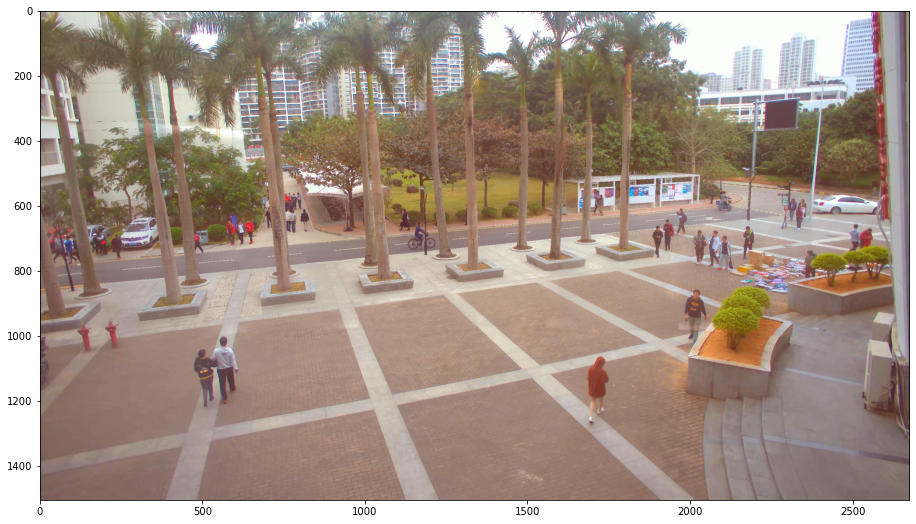

In [11]:
from random import random
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))
img_name=corner_train_anno['images'][0]['file_name']
img=Image.open('image_train/'+img_name)
plt.imshow(img)
plt.show()

In [12]:
img_infos=name2infos[img_name]
img_infos

[{'file_name': '01_University_Canteen/IMG_01_01.jpg',
  'height': 1024,
  'width': 1024,
  'id': 0,
  'corner': [0, 0, 1024, 1024]},
 {'file_name': '01_University_Canteen/IMG_01_01.jpg',
  'height': 1024,
  'width': 1024,
  'id': 1,
  'corner': [0, 481, 1024, 1505]},
 {'file_name': '01_University_Canteen/IMG_01_01.jpg',
  'height': 1024,
  'width': 1024,
  'id': 2,
  'corner': [1024, 0, 2048, 1024]},
 {'file_name': '01_University_Canteen/IMG_01_01.jpg',
  'height': 1024,
  'width': 1024,
  'id': 3,
  'corner': [1024, 481, 2048, 1505]},
 {'file_name': '01_University_Canteen/IMG_01_01.jpg',
  'height': 1024,
  'width': 1024,
  'id': 4,
  'corner': [1651, 0, 2675, 1024]},
 {'file_name': '01_University_Canteen/IMG_01_01.jpg',
  'height': 1024,
  'width': 1024,
  'id': 5,
  'corner': [1651, 481, 2675, 1505]}]

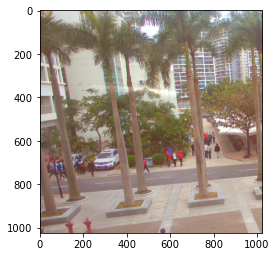

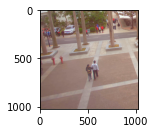

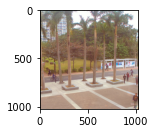

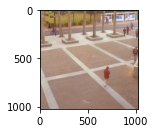

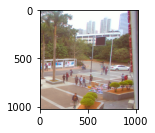

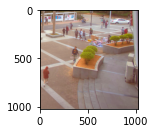

In [25]:
plt.figure(figsize=(18,9))
color=(0,1,0)
for i, img_info in enumerate(img_infos):
    plt.subplot(2,3,i+1)
    corner=img_info['corner']
    sub_img=img.crop(corner)
    plt.imshow(sub_img)
    if img_info['id'] in img2annos:
        for anno in img2annos[img_info['id']]:
            box = anno['bbox']
            plt.gca().add_patch(plt.Rectangle((corner[0]+box[0], corner[1]+box[1]), box[2], box[3], fill=False, color=color))
    plt.show()

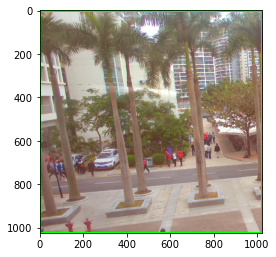

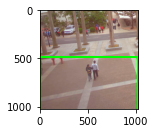

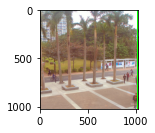

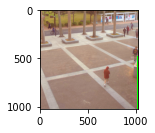

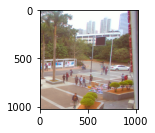

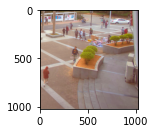

In [19]:
plt.figure(figsize=(18, 9))
color = (0, 1, 0)
for i,  img_info in enumerate(img_infos):
    plt.subplot(2, 3, i+1)
    corner = img_info['corner']
    sub_img = img.crop(corner)
    plt.gca().add_patch(plt.Rectangle((corner[0], corner[1]), corner[2], corner[3], fill=False, color=color, linewidth=2))
    plt.imshow(sub_img)
    plt.show()
    '''
    if img_info['id'] in im2annos:
        for anno in im2annos[img_info['id']]:
            box = anno['bbox']
            plt.gca().add_patch(plt.Rectangle((corner[0]+box[0], corner[1]+box[1]), box[2], box[3], fill=False, color=color))
            '''

2386 449 7 14
2417 446 2 2
2421 445 2 3
2426 445 2 3
2431 447 1 1
2431 451 1 1
2486 442 2 2
2491 442 2 2
2586 439 6 9
2763 554 4 6
2763 1035 4 6
3390 554 4 6
3390 1035 4 6


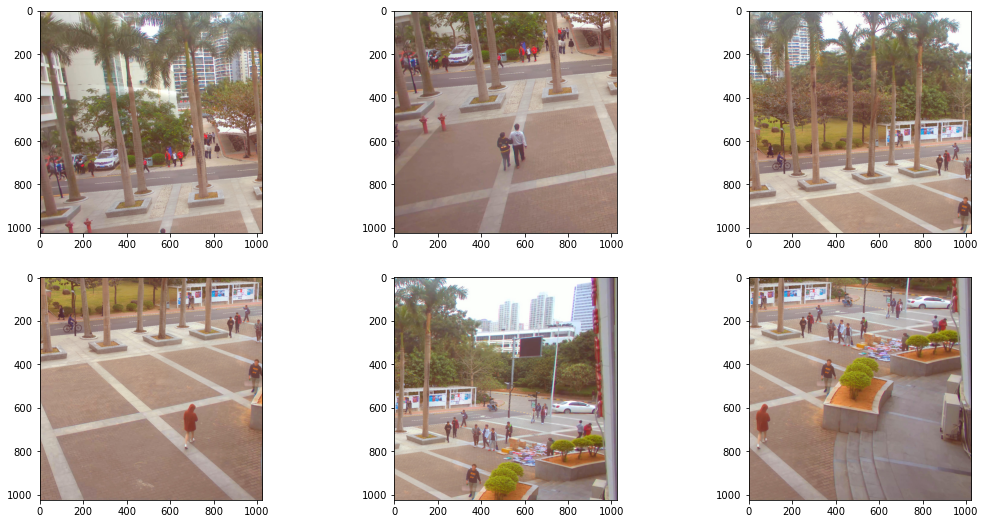

In [26]:
plt.figure(figsize=(18, 9))
color = (0, 1, 0)
for i,  img_info in enumerate(img_infos):
    plt.subplot(2, 3, i+1)
    corner = img_info['corner']
    sub_img = img.crop(corner)
#     plt.gca().add_patch(plt.Rectangle((corner[0], corner[1]), corner[2], corner[3], fill=False, color=color, linewidth=2))
    plt.imshow(sub_img)
    if img_info['id'] in img2annos:
        for anno in img2annos[img_info['id']]:
            box = anno['bbox']
            print(corner[0]+box[0], corner[1]+box[1], box[2], box[3])
            plt.gca().add_patch(plt.Rectangle((corner[0]+box[0], corner[1]+box[1]), box[2], box[3], fill=False, color=color))

## task
task means making TinyPerson as a binary-classification task,where there are three kinds of taskes


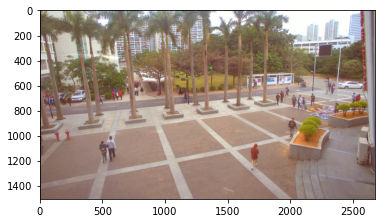

In [36]:
import os
annos=json.load(open('panda_train_test_for_tiny_1024_1024.json','r'))
annos['annotations'][0]
img_filename=""
for split in annos['images']:
    if split['id']==annos['annotations'][0]['id']:
        img_filename=split['file_name']
        break
img=plt.imread(os.path.join('image_train',img_filename))
corner=split['corner']
box=annos['annotations'][0]['bbox']
plt.imshow(img)
plt.gca().add_patch(plt.Rectangle((corner[0]+box[0], corner[1]+box[1]), box[2], box[3], fill=False, color=color))   
plt.show()

In [42]:
ann=json.load(open('anno.json','r'))
ann.keys()

dict_keys(['categories', 'images', 'annotations', 'type'])

In [44]:
ann['images'][0]

{'file_name': '01_University_Canteen/IMG_01_01.jpg',
 'height': 15052,
 'width': 26753,
 'id': 1}

[13624.800000000001, 4493.6, 74.4, 144.8]


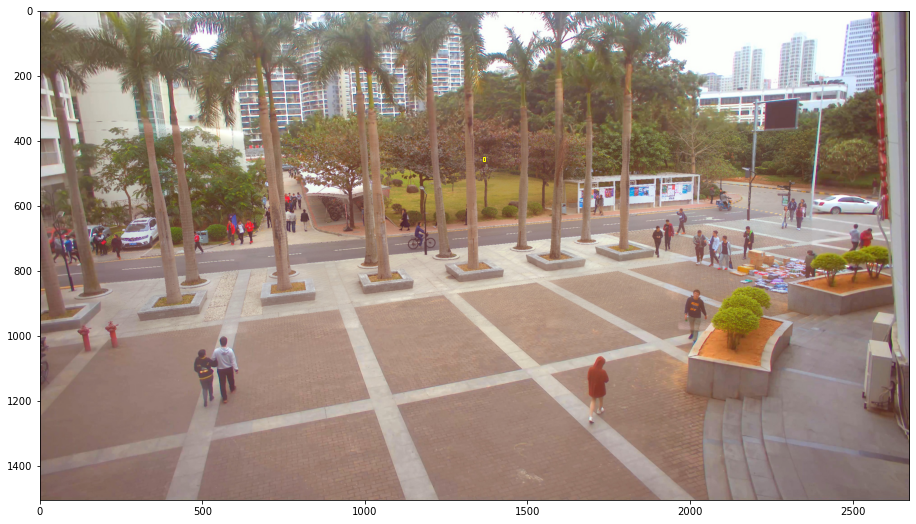

In [56]:
color = (1, 1, 0)
plt.figure(figsize=(18,9))
ann['annotations'][0]
img_path=""
for item in ann['images']:
    if item['id']==1:
        img_path=item['file_name']
        break
img=plt.imread(os.path.join('image_train',img_path))
bbox=ann['annotations'][0]['bbox']
for i in bbox:
    i=i/10
print(bbox)
plt.imshow(img)
plt.gca().add_patch(plt.Rectangle(((int)(bbox[0]/10), (int)(bbox[1]/10)), (int)(box[2]), (int)(box[3]), fill=False, color=color))   
plt.show()